In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tf_utils import load_dataset, Boundary_function
import pandas as pd 
from sklearn import svm

plot the training data

Text(0, 0.5, 'X2')

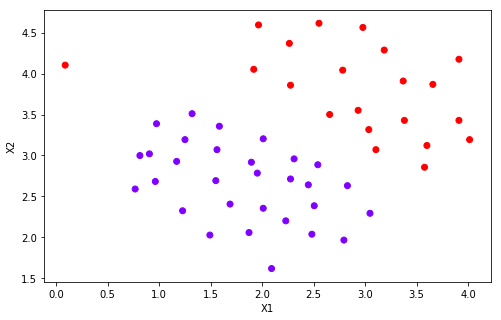

In [2]:
X, Y = load_dataset()
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=Y.flatten(), cmap='rainbow')
plt.xlabel('X1')
plt.ylabel('X2')

In [3]:
models = [svm.SVC(C, kernel='linear', gamma='auto') for C in [1, 100]]
clfs = [model.fit(X, Y.ravel()) for model in models]

In [4]:
def plotBoundary(clf, X):
    '''plot decision bondary'''
    x_min, x_max = X[:,0].min()*1.2, X[:,0].max()*1.1
    y_min, y_max = X[:,1].min()*1.1,X[:,1].max()*1.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z)

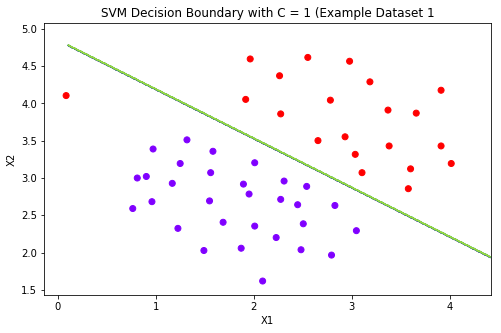

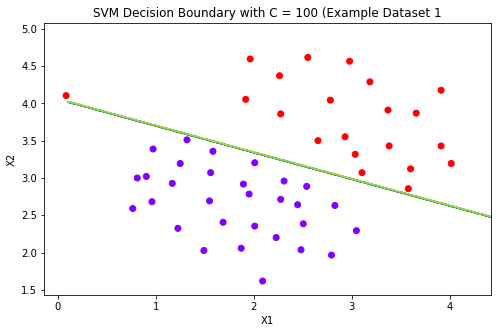

In [5]:
title = ['SVM Decision Boundary with C = {} (Example Dataset 1'.format(C) for C in [1, 100]]
for model, title in zip(clfs,title):
    plt.figure(figsize=(8,5))
    plt.scatter(X[:,0], X[:,1], c=Y.flatten(), cmap='rainbow')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plotBoundary(model, X)
    plt.title(title)

[1.40718563 2.13398052]


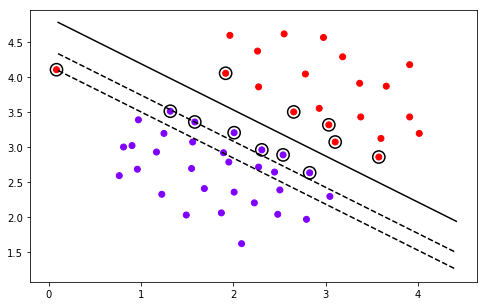

[ 2.22237121  1.0876891   3.5836762   1.35665588  0.779535    2.11624609
  1.72699229  4.0667434   2.1940707   3.09283937  2.73711357  0.57337293
  1.00024232  2.16346429  0.85852265  3.28590768  3.05524394  2.47265996
  1.37975249  1.00024201 -0.95493544 -0.68297233 -1.65944445 -1.35827937
 -0.78527174 -0.75466533 -1.16735029 -2.50771951 -1.73272903 -3.32341386
 -2.49536199 -3.66326441 -1.45646554 -1.59904025 -2.4231479  -2.84013295
 -3.92372564 -3.27184946 -2.45603426 -2.80574725 -1.74886318 -1.77462217
 -1.00048702 -2.51510846 -1.26776998 -2.22295047 -3.95433235 -0.61406257
 -2.63204473 -3.74398637 -1.46838687]
[ 4.68150544 13.08944402]


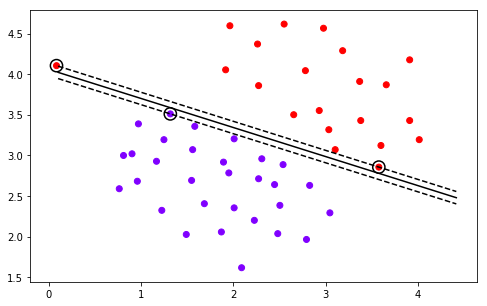

[ 16.2205912    8.03223703  20.56616443   7.08812235   0.99968557
   7.46955389   7.58460717  19.84315158  12.81636773  19.23930925
  13.82632428   1.60106391   8.9063683   14.67626823   5.1248155
  17.92049527  14.63970774  10.0653369    4.59046124   4.49233934
  -1.76666676  -1.78194774  -7.54393316  -6.9708837   -3.59282722
  -5.45272771  -8.84909221 -14.84054996 -10.17774882 -17.43205253
 -12.89881255 -16.96814984  -6.07138288  -5.62624419 -10.63574501
 -13.73972746 -19.61249789 -13.52095073  -9.3357072  -10.0702686
  -4.224657    -5.47480866  -0.99934499 -13.88456961  -7.0986556
 -14.32264675 -22.16662635  -3.4527215   -9.36899126 -15.64336137
   0.99968063]


In [6]:
for model, title in zip(clfs,title):
    Boundary_function(model, X, Y)

Text(0, 0.5, 'X2')

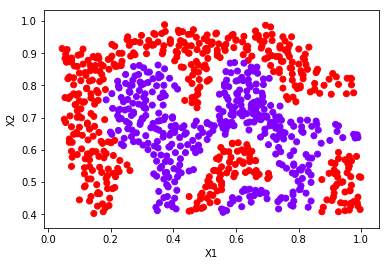

In [12]:
from scipy.io import loadmat
mat = loadmat('ex6data2.mat')
X2 = mat['X']
y2 = mat['y']
plt.scatter(X2[:,0], X2[:,1], c=y2.flatten(), cmap='rainbow')
plt.xlabel('X1')
plt.ylabel('X2')

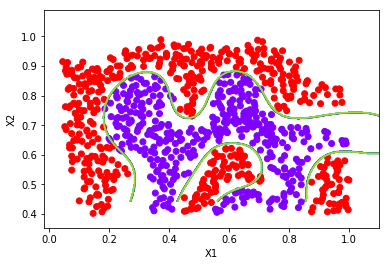

In [13]:
sigma = 0.1
gamma = np.power(sigma,-2.)/2
clf = svm.SVC(C=1, kernel='rbf', gamma=gamma)
modle = clf.fit(X2, y2.flatten())
plt.scatter(X2[:,0], X2[:,1], c=y2.flatten(), cmap='rainbow')
plt.xlabel('X1')
plt.ylabel('X2')
plotBoundary(modle, X2)

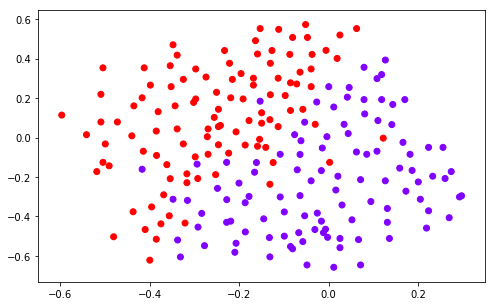

In [15]:
data = loadmat('ex6data3.mat')
X3 = data['X']
y3 = data['y']
Xval = data['Xval']
yval = data['yval']
plt.figure(figsize=(8, 5))
plt.scatter(X3[:, 0], X3[:, 1], c=y3.flatten(), cmap='rainbow')

In [16]:
Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmavalues = Cvalues
best_pair, best_score = (0, 0), 0

for C in Cvalues:
    for sigma in sigmavalues:
        gamma = np.power(sigma,-2.)/2
        model = svm.SVC(C=C,kernel='rbf',gamma=gamma)
        model.fit(X3, y3.flatten())
        this_score = model.score(Xval, yval)
        if this_score > best_score:
            best_score = this_score
            best_pair = (C, sigma)
print('best_pair={}, best_score={}'.format(best_pair, best_score))
# best_pair=(1.0, 0.1), best_score=0.965

best_pair=(1.0, 0.1), best_score=0.965


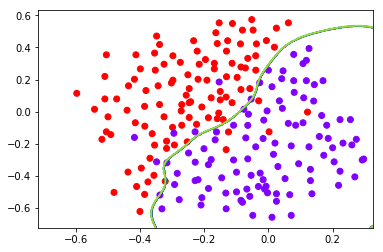

In [17]:
clf = svm.SVC(C=1., kernel='rbf', gamma=np.power(.1, -2.) / 2)
clf.fit(X3, y3.flatten())
plt.scatter(X3[:, 0], X3[:, 1], c=y3.flatten(), cmap='rainbow')
plotBoundary(clf, X3)

In [23]:
print(clf.support_)   # 支持向量的索引

[ 26  29  39  40  41  43  44  45  46  48  49  50  54  55  56  57  58  59
  63  65  71  74 117 118 119 151 153 154 155 156 161 162 163 164 165 166
 169 170 172 173 175 176 177 180 183 184 185 187 190 204 209 210   1   2
   3   4   5   6   7   8   9  10  36  37  38  85  86  96  98 101 102 106
 107 109 110 111 115 116 121 122 125 128 129 130 134 139 140 141 145 146
 194 198 201 203 205 206 207 208]


In [19]:
print(clf.n_support_)   #支持向量的个数

[52 46]


In [22]:
print(clf.support_vectors_[0], clf.support_vectors_.shape)   # 支持向量

[ 0.09447  -0.324561] (98, 2)


 Spam Classification

In [8]:
with open('emailSample1.txt', 'r') as f:
    emial = f.read()
    print(emial)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100.
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com



In [10]:
def processEmail(email):
    import re
    """做除了Word Stemming和Removal of non-words的所有处理"""
    email = email.lower()
    email = re.sub('<[^<>]>', ' ', email)  # 匹配<开头，然后所有不是< ,> 的内容，知道>结尾，相当于匹配<...>
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email )  # 匹配//后面不是空白字符的内容，遇到空白字符则停止
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)
    email = re.sub('[\$]+', 'dollar', email)
    email = re.sub('[\d]+', 'number', email) 
    return email

In [11]:
print(processEmail(emial))

> anyone knows how much it costs to host a web portal ?
>
well, it depends on how many visitors you're expecting.
this can be anywhere from less than number bucks a month to a couple of dollarnumber.
you should checkout httpaddr or perhaps amazon ecnumber
if youre running something big..

to unsubscribe yourself from this mailing list, send an email to:
emailaddr

